# Importing necessary Libraries

In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Importing the dataset

In [482]:
df = pd.read_csv("datasets ml/Diwali Sales Data.csv", encoding="ISO-8859-1")
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [434]:
df.shape    #(rows, columns)

(11251, 15)

# Data Cleaning

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [490]:
df.drop(["Status", "unnamed1"], axis=1, inplace=True)     # Removing empty columns

In [438]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [439]:
df.shape

(11251, 13)

### Filling up the Null values in Amount Column using Imputation

In [441]:
df[df["Amount"].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [442]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values=np.nan, strategy="mean")

In [443]:
df.iloc[:,12:] = imputer.fit_transform(df.iloc[:,12:].values)

In [444]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [445]:
df[df["Amount"].isnull()]  # all null rows are filled now

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount


# Exploratory Data Analysis

In [447]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [448]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


### Gender 

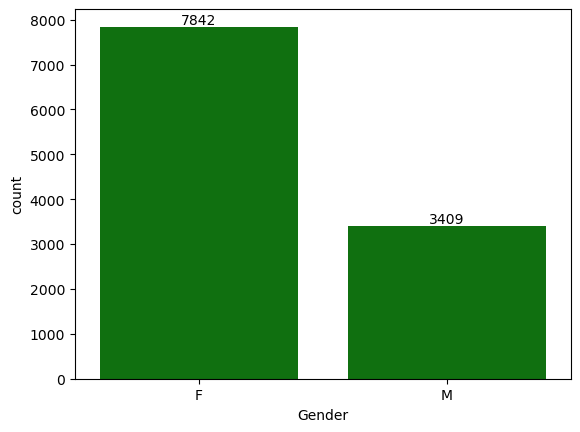

In [450]:
ax = sns.countplot(data=df, x="Gender", color="Green")

for bars in ax.containers:
    ax.bar_label(bars)

 #### <b>Above Graph shows that 'females' have shopped the most during Diwali</b> 

In [452]:
total_money = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
total_money

,Gender,Amount
0,F,7.443039e+07
1,M,3.193218e+07


<Axes: xlabel='Gender', ylabel='Amount'>

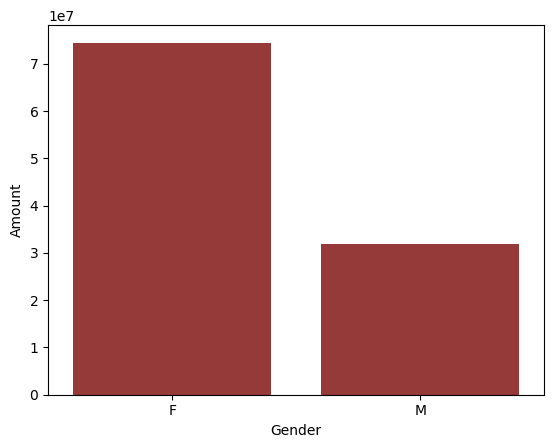

In [453]:
sns.barplot(data=total_money, x="Gender",y="Amount", color="Brown")

#### <b>Above graph shows that purchasing power of females are greater than men</b>

### Age Group

In [456]:
labels = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

<Axes: xlabel='Age Group', ylabel='count'>

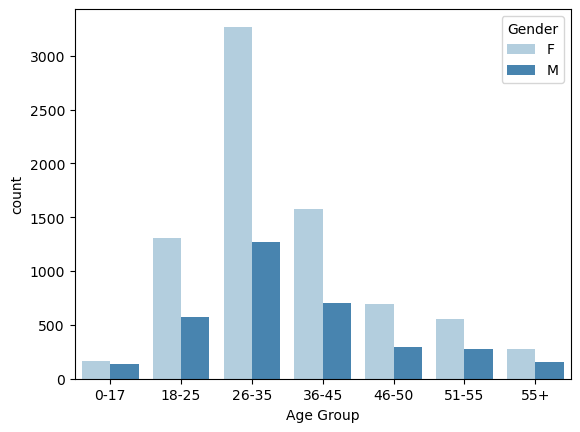

In [457]:
sns.countplot(data=df, x="Age Group", hue="Gender", palette="Blues", order=labels)

#### <b>Above graph shows that most of the customers are from the age group '26-35' and are female.</b>

<Axes: xlabel='Age Group', ylabel='Amount'>

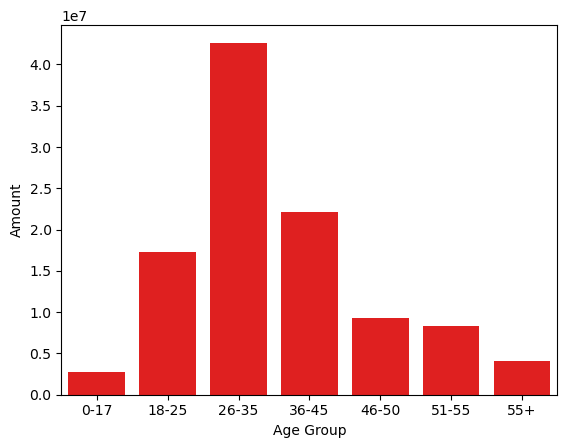

In [459]:
total_money = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(data=total_money, x="Age Group", y="Amount", order=labels, color="Red")

#### <b>Above graph shows that purchasing power of Age Group '26-35' is the highest as compared to other Age Groups.</b>

### State

In [462]:
total_orders = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
total_orders

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


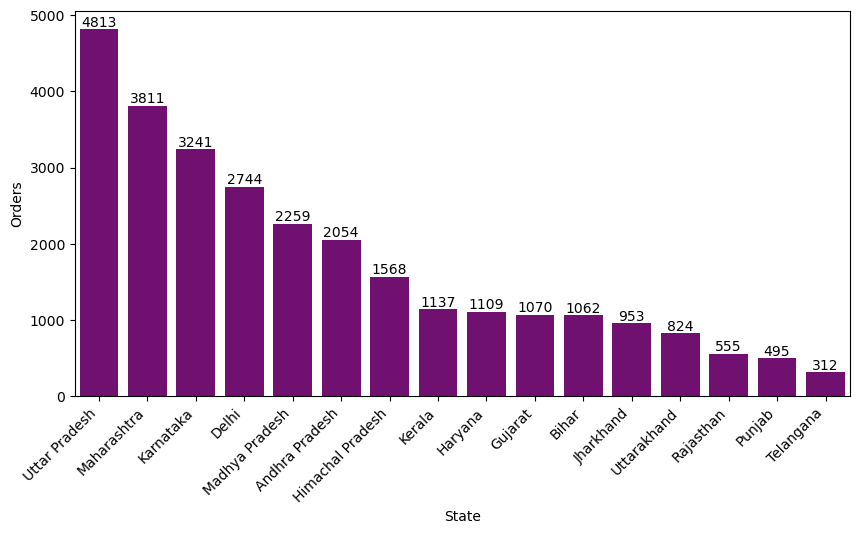

In [463]:
plt.figure(figsize=(10,5))                  # made the plot size bigger so that graphs looks evenly spaced

ax = sns.barplot(data=total_orders, x="State", y="Orders", color="purple")
plt.xticks(rotation=45, ha="right")         # to set rotation of x-labels
for bars in ax.containers:                  # to set labels to every bar
    ax.bar_label(bars)

#### <b> Above graph shows that most of the orders are from state 'UttarPradesh'</b>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Kerala'),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Punjab'),
  Text(15, 0, 'Telangana')])

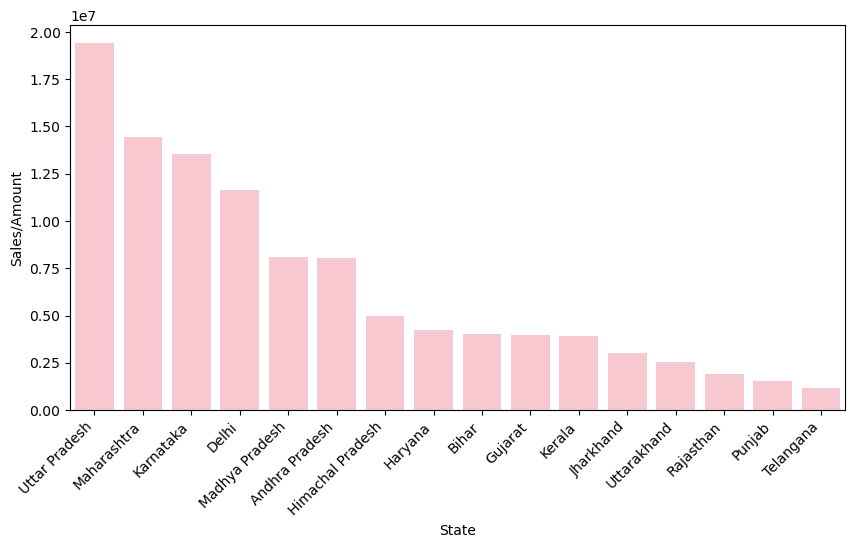

In [465]:
total_amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
plt.figure(figsize=(10,5))                  # made the plot size bigger so that graphs looks evenly spaced

ax = sns.barplot(data=total_amount, x="State", y="Amount", color="pink")
plt.ylabel("Sales/Amount")
plt.xticks(rotation=45, ha="right")         # to set rotation of x-labels


#### <b> Above graph shows that most of the sales are from state 'UttarPradesh'</b>

### Marital Status

In [473]:
total_amount = df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
total_amount

,Marital_Status,Gender,Amount
0,0,F,4.381501e+07
2,1,F,3.061538e+07
1,0,M,1.834819e+07
3,1,M,1.358399e+07


([<matplotlib.axis.XTick at 0x22012519820>,
 [Text(0, 0, 'Unmarried'), Text(1, 0, 'Married')])

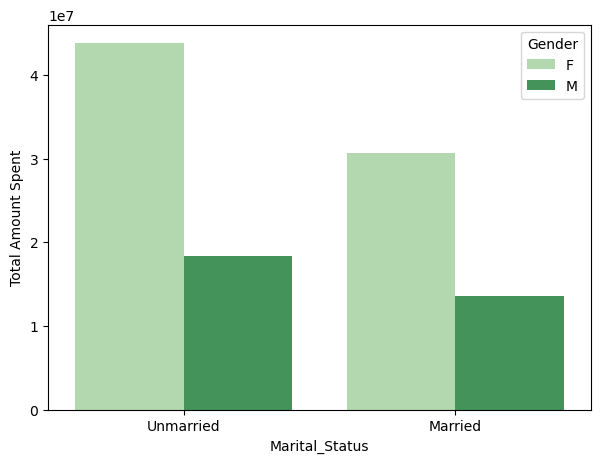

In [520]:
plt.figure(figsize=(7,5))                 

ax = sns.barplot(data=total_amount, x="Marital_Status", y="Amount", hue="Gender", palette="Greens")
plt.ylabel("Total Amount Spent")
plt.xticks(ticks=[0,1], labels=["Unmarried", "Married"])

#### <b>Above graph shows that 'Unmarried' females have spent the most </b> 

### Occupation

In [480]:
df["Occupation"].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'IT Sector', 'Media', 'Banking',
       'Retail', 'Hospitality', 'Aviation', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

C:\Users\Think\AppData\Local\Temp\ipykernel_9996\1608371630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x="Occupation", palette="Set1")


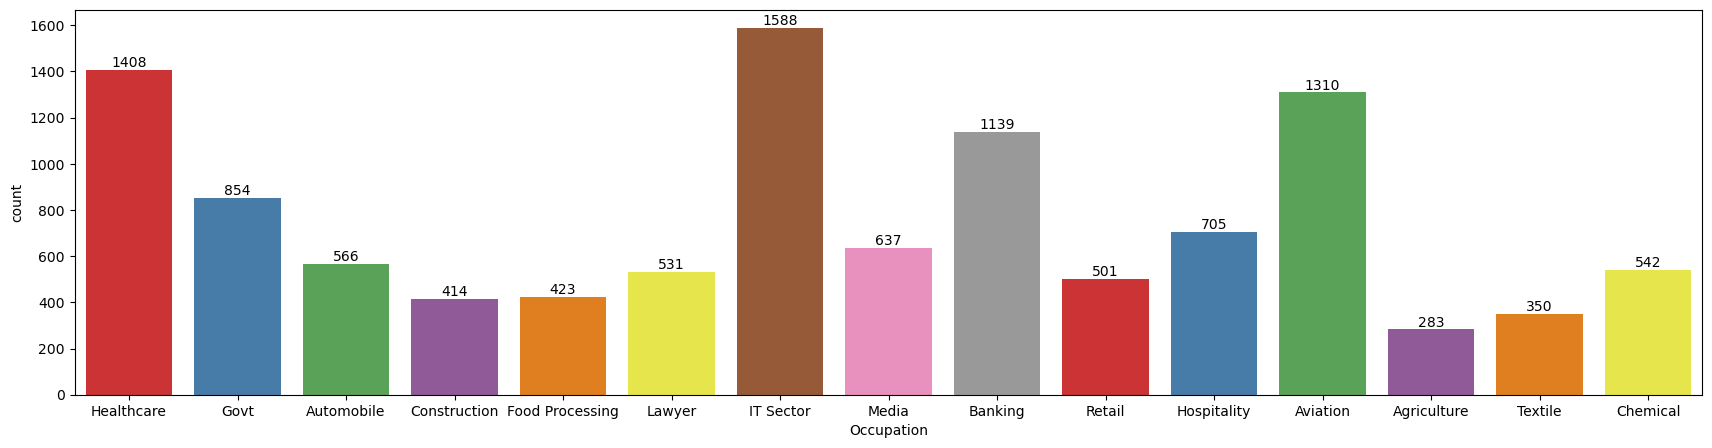

In [540]:
plt.figure(figsize=(21,5))
ax=sns.countplot(data=df, x="Occupation", palette="Set1")

for bars in ax.containers:                  # to set labels to every bar
    ax.bar_label(bars)

Text(0, 0.5, 'Sales/ Amount')

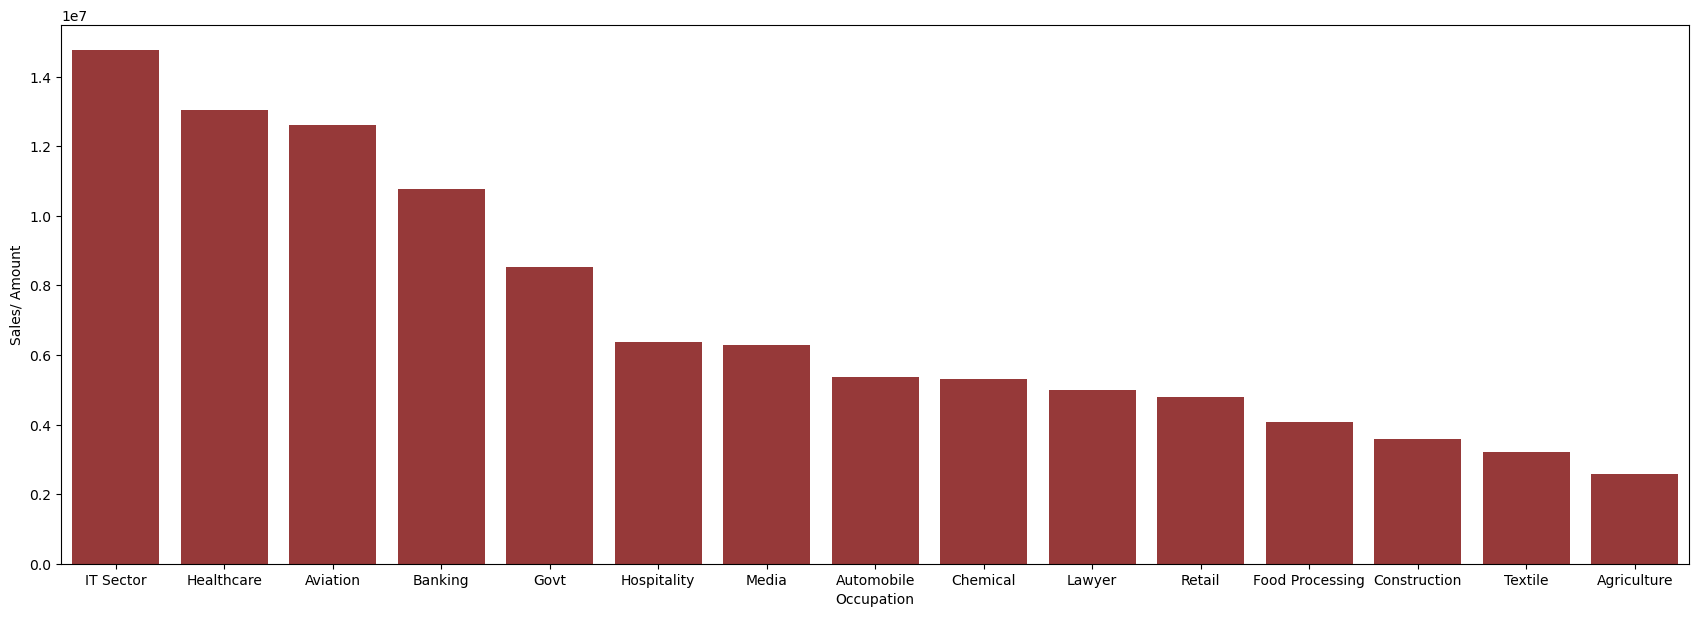

In [554]:
total_amount = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
plt.figure(figsize=(21,7))                  # made the plot size bigger so that graphs looks evenly spaced

ax = sns.barplot(data=total_amount, x="Occupation", y="Amount", color="Brown")
plt.ylabel("Sales/ Amount")

#### <b>Above graph shows that most of the buyers are working in IT, Healthcare and Aviation sector.</b>

### Product catageory

In [558]:
df["Product_Category"].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

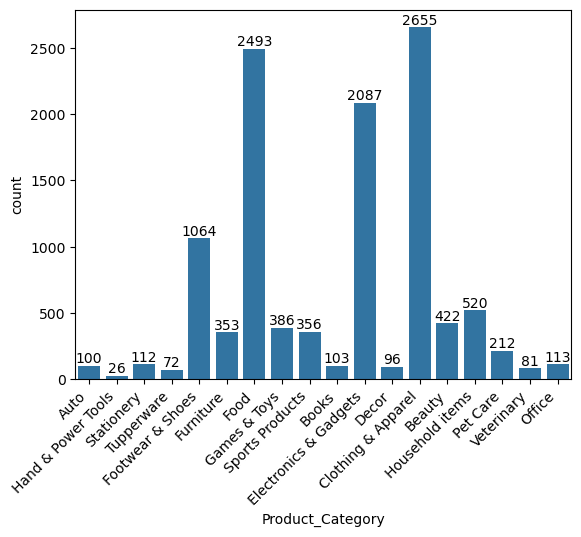

In [582]:
ax = sns.countplot(data=df, x="Product_Category")
for bars in ax.containers:                  # to set labels to every bar
    ax.bar_label(bars)

plt.xticks(rotation=45, ha="right")

#### <b>Above graph show that most of the sold products are from Clothing & Apparel, Food, Electronics & Gadgets category.

Text(0, 0.5, 'Sales/ Amount')

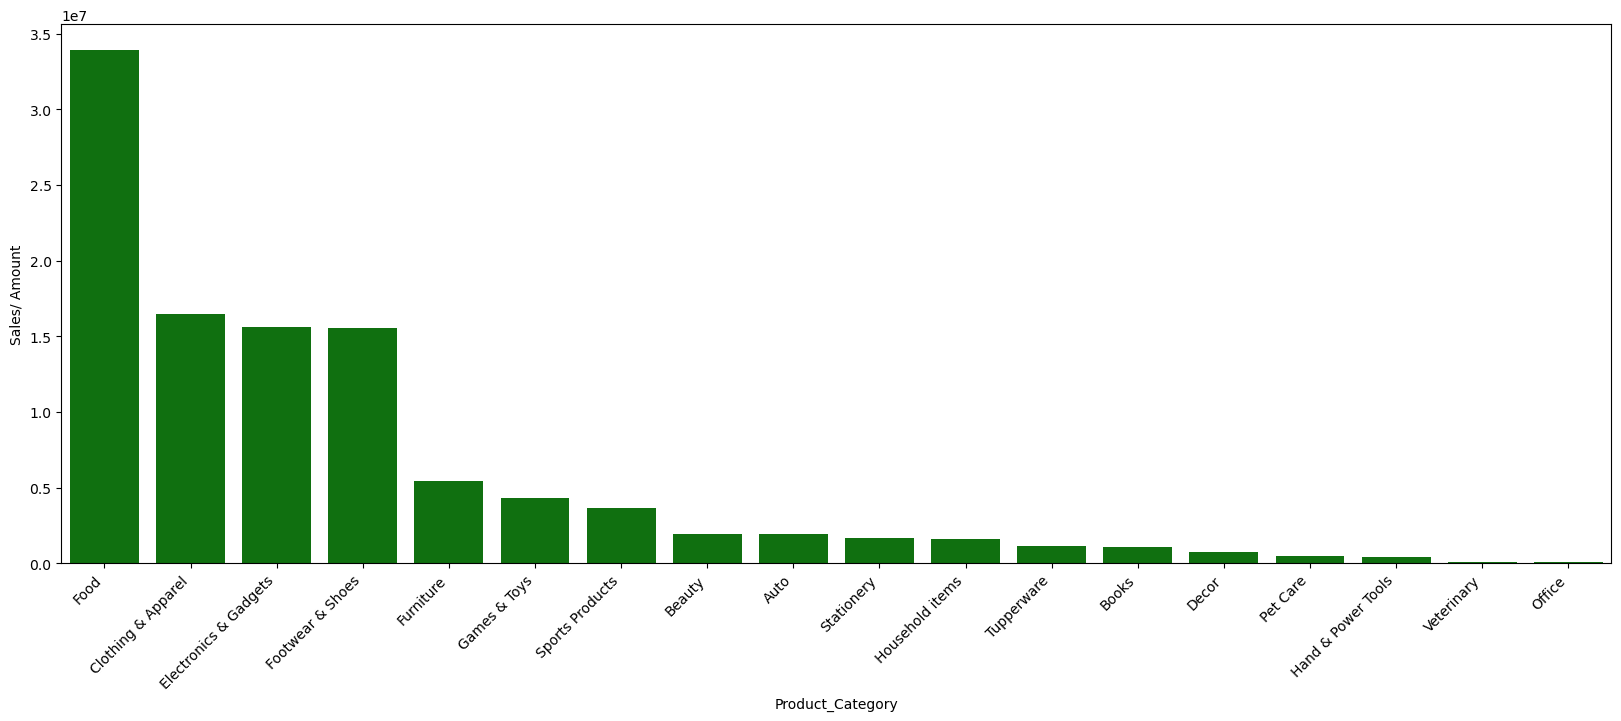

In [574]:
total_amount = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

plt.figure(figsize=(20,7))                  # made the plot size bigger so that graphs looks evenly spaced

ax = sns.barplot(data=total_amount, x="Product_Category", y="Amount", color="Green")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Sales/ Amount")


#### <b> Above graph shows that most of the revenue is got from the Food category despite of Clothing & Apparel is sold more

Text(0, 0.5, 'No. of orders')

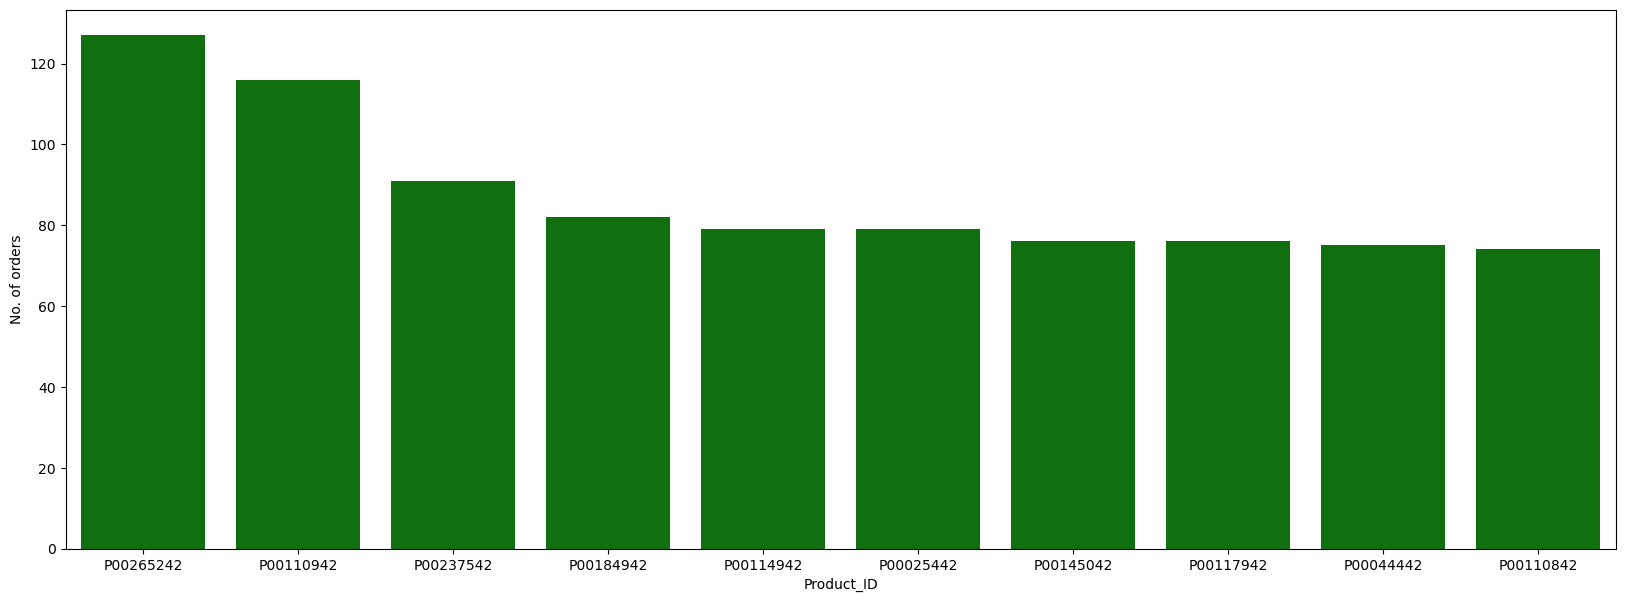

In [592]:
total_amount = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

plt.figure(figsize=(20,7))                  # made the plot size bigger so that graphs looks evenly spaced

ax = sns.barplot(data=total_amount, x="Product_ID", y="Orders", color="Green")
plt.ylabel("No. of orders")


# Conclusion

### <b><i> Unmarried females of the age group 26-35 years from UttarPradesh, Maharashtra and Karnataka working in IT, Healthcare, Aviation sectors are more likely to buy products from Food, Clothing & Apparel and Electronics & Gadgets category. 